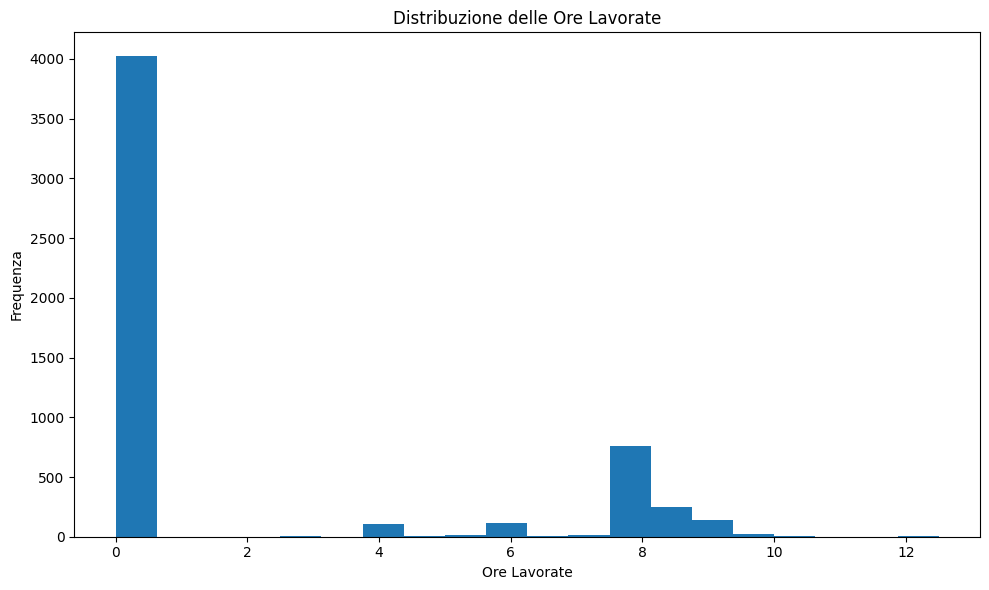

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carica il foglio delle ore lavorate
df_hr = pd.read_excel('ANALISI CAUSALI OEE.xlsx', sheet_name='Merge C', header=0)

# 2) Pulisci/converti la colonna delle ore
df_hr['ORE LAVORATE'] = pd.to_numeric(df_hr['ORE LAVORATE'], errors='coerce')

# 3) Istogramma della distribuzione delle ore lavorate
plt.figure(figsize=(10, 6))
plt.hist(df_hr['ORE LAVORATE'].dropna(), bins=20)
plt.title('Distribuzione delle Ore Lavorate')
plt.xlabel('Ore Lavorate')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()


In [74]:
# Cell 1 (aggiornata): UNI­FICA INTESTAZIONI E RINOMINA
# ————————————————————————————————————————————————————————————————

# 1) Standardizza tutte le intestazioni
df_hr.columns = (
    df_hr.columns
         .str.strip()
         .str.upper()
         .str.replace(r'\s+', '_', regex=True)
         .str.replace(r'[^\w]', '', regex=True)
)

# 2) Se esiste ancora "TABELLA11OPERATORE", rinominala in "OPERATORE"
if 'TABELLA11OPERATORE' in df_hr.columns:
    df_hr.rename(columns={'TABELLA11OPERATORE': 'OPERATORE'}, inplace=True)

# 3) Converte ORE_LAVORATE in numerico
df_hr['ORE_LAVORATE'] = pd.to_numeric(df_hr['ORE_LAVORATE'], errors='coerce')

# 4) Controllo finale
print("Colonne df_hr:", df_hr.columns.tolist())


Colonne df_hr: ['GIORNODATA', 'GGLAVORATIVO', 'GIORNOSET', 'CHIAVE_C', 'MESE', 'SETTIMANA', 'OPERATORE', 'TABELLA11ORARIO_STD', 'ORARIO_STD', 'ORE_LAVORATE', 'STRAORDINARIO']


<Figure size 1600x800 with 0 Axes>

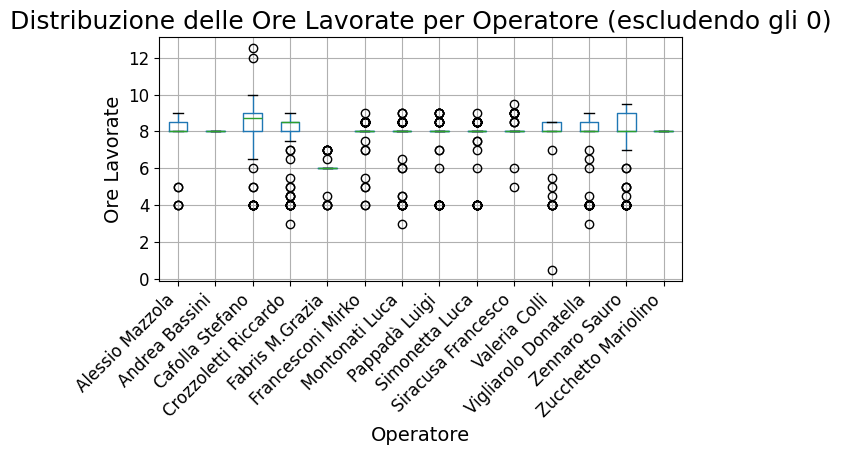

In [75]:
# Cell 2: BOXPLOT escludendo gli 0
df_nonzero = df_hr[df_hr['ORE_LAVORATE'] > 0].copy()
plt.figure(figsize=(16, 8), dpi=100)
ax = df_nonzero.boxplot(
    column='ORE_LAVORATE',
    by='OPERATORE',
    rot=45,
    grid=True
)
plt.title('Distribuzione delle Ore Lavorate per Operatore (escludendo gli 0)', fontsize=18)
plt.suptitle('')
plt.xlabel('Operatore', fontsize=14)
plt.ylabel('Ore Lavorate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [76]:
# Linea VERDE: mediana delle ore.

# Box: 1º e 3º quartile (range interquartile).

# “Baffi”: valori entro 1.5×IQR dai quartili.

# Cerchi: outlier oltre i baffi.

# Si vede ad esempio che la maggior parte degli operatori lavora intorno alle 8 h, ma ci sono diversi valori isolati sopra le 9–10 h (outlier) e qualche caso sotto alle 6 h.

Colonne df_hr: ['GIORNODATA', 'GGLAVORATIVO', 'GIORNOSET', 'CHIAVE_C', 'MESE', 'SETTIMANA', 'OPERATORE', 'TABELLA11ORARIO_STD', 'ORARIO_STD', 'ORE_LAVORATE', 'STRAORDINARIO']


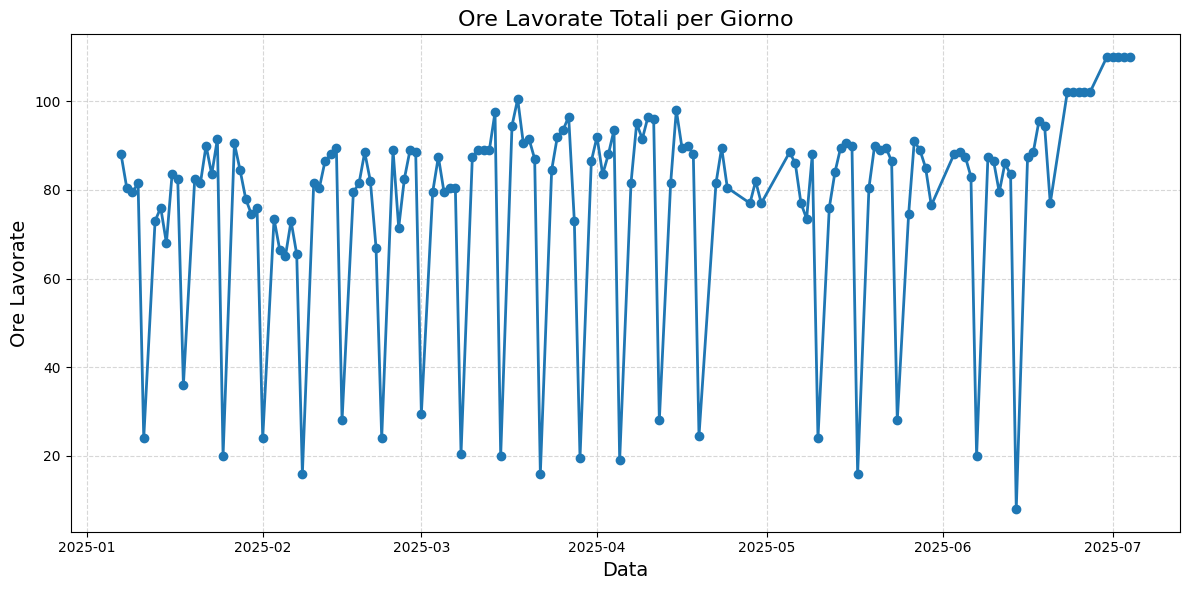

In [77]:
# ─── Cell: Standardizza le colonne ─────────────────────────────────────────────
# (da eseguire solo una volta, in cima al notebook)

# 1) Pulisci e porta tutto in maiuscolo + underscore
df_hr.columns = (
    df_hr.columns
         .str.strip()
         .str.upper()
         .str.replace(r'\s+', '_', regex=True)
         .str.replace(r'[^\w]',   '',   regex=True)
)

# 2) Rinomina eventuale TABELLA11OPERATORE
if 'TABELLA11OPERATORE' in df_hr.columns:
    df_hr.rename(columns={'TABELLA11OPERATORE':'OPERATORE'}, inplace=True)

# 3) Converte la colonna ore in numerico
df_hr['ORE_LAVORATE'] = pd.to_numeric(df_hr['ORE_LAVORATE'], errors='coerce')

# 4) Verifica
print("Colonne df_hr:", df_hr.columns.tolist())

# ─── Cell: Line chart giornaliero ───────────────────────────────────────────────
# Assicurati di aver già eseguito la cella di normalizzazione qui sopra

# 1) Converti la colonna data in datetime (dayfirst=True se formato gg/mm/aaaa)
df_hr['GIORNODATA'] = pd.to_datetime(df_hr['GIORNODATA'],
                                     dayfirst=True,
                                     errors='coerce')

# 2) Raggruppa e somma solo le ore > 0
daily_hours = (
    df_hr[df_hr['ORE_LAVORATE'] > 0]
    .groupby('GIORNODATA')['ORE_LAVORATE']
    .sum()
    .sort_index()
)

# 3) Disegna il line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_hours.index,
         daily_hours.values,
         marker='o', linewidth=2)
plt.title('Ore Lavorate Totali per Giorno', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Ore Lavorate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


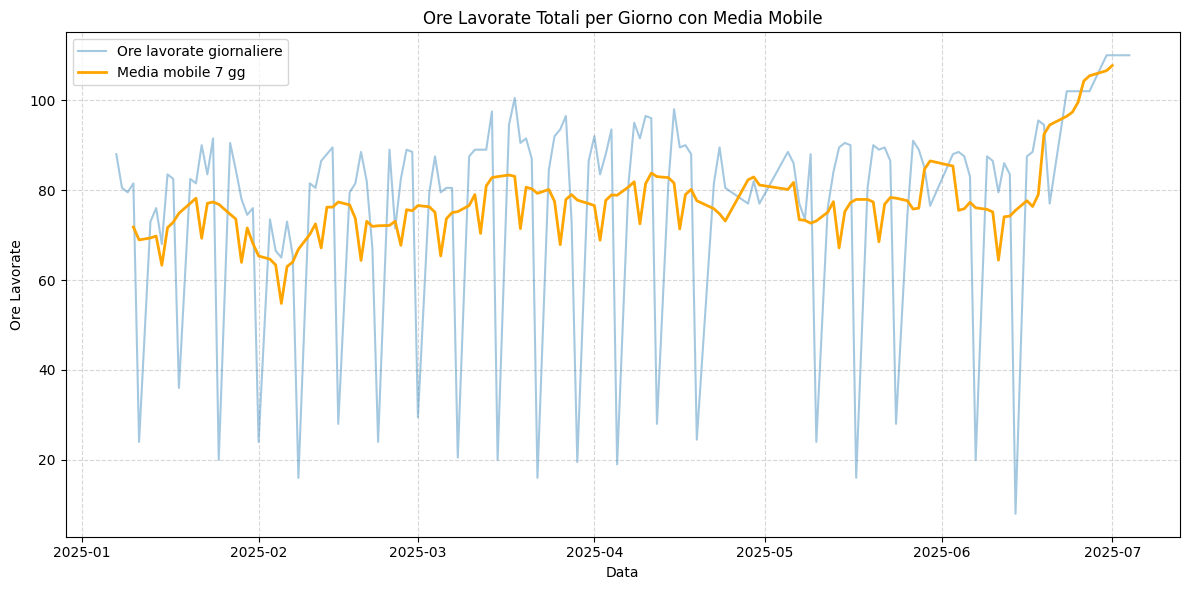

In [78]:
# Calcola e disegna la media mobile su 7 giorni
rolling7 = daily_hours.rolling(window=7, center=True).mean()
plt.figure(figsize=(12,6))
plt.plot(daily_hours.index, daily_hours,   label='Ore lavorate giornaliere', alpha=0.4)
plt.plot(rolling7.index,   rolling7,        label='Media mobile 7 gg',       color='orange', linewidth=2)
plt.title('Ore Lavorate Totali per Giorno con Media Mobile')
plt.xlabel('Data')
plt.ylabel('Ore Lavorate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


                      Total_Absence  Total_OT
OPERATORE                                    
Alessio Mazzola              2282.0      25.0
Andrea Bassini               2840.0       0.0
Cafolla Stefano              1918.0     126.0
Crozzoletti Riccardo         1935.5      96.0
Fabris M.Grazia              1473.5      19.5
Francesconi Mirko            1963.0      21.0
Montonati Luca               2249.5      55.5
Muskaj Florjan               2920.0       0.0
Pappadà Luigi                1952.0      62.5
Simonetta Luca               1924.0      57.0
Siracusa Francesco           2149.0      10.0
Valeria Colli                1965.5      46.0
Vigliarolo Donatella         1885.0     117.5
Zennaro Sauro                1941.5     133.0
Zucchetto Mariolino          2848.0       0.0
Pearson r = -0.550, p = 0.034


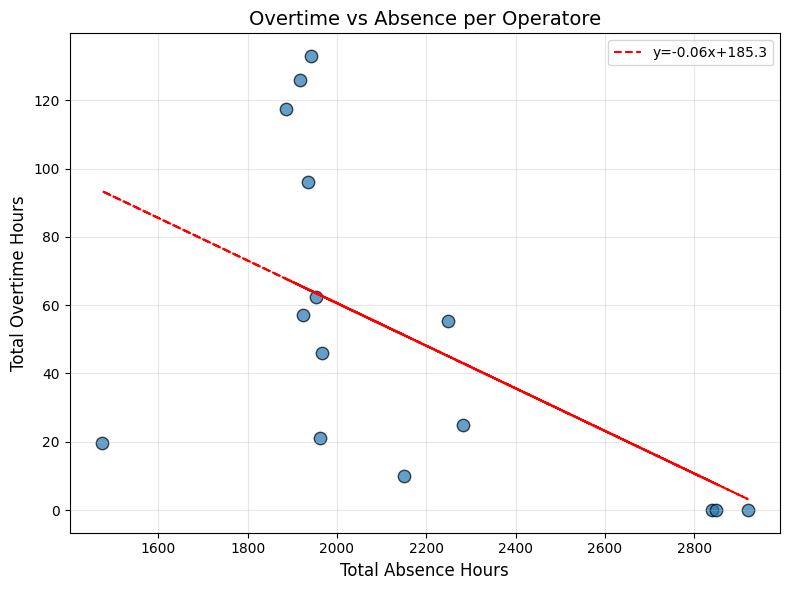

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ———————————————————————————————
#   Step 0: Assumi df_hr già caricato da “Merge C”
# ———————————————————————————————

# 1) Normalizza i nomi delle colonne (rimuove spazi esterni)
df_hr.columns = df_hr.columns.str.strip()

# 2) Trova dinamicamente i tre campi
std_col = [c for c in df_hr.columns if 'ORARIO' in c.upper() and 'STD' in c.upper()]
wrk_col = [c for c in df_hr.columns if 'ORE' in c.upper() and 'LAVORATE' in c.upper()]
ot_col  = [c for c in df_hr.columns if 'STRAORDINARIO' in c.upper()]

if not std_col or not wrk_col or not ot_col:
    raise KeyError(f"Colonne non trovate: std={std_col}, wrk={wrk_col}, ot={ot_col}")

std_col = std_col[0]
wrk_col = wrk_col[0]
ot_col  = ot_col[0]

# 3) Pulisci / converti in numerico
df_hr[std_col] = pd.to_numeric(df_hr[std_col], errors='coerce')
df_hr[wrk_col] = pd.to_numeric(df_hr[wrk_col], errors='coerce')
df_hr[ot_col]  = pd.to_numeric(df_hr[ot_col],  errors='coerce').fillna(0)

# 4) Calcola hours deficit (assenza) e overtime “puliti”
df_hr['Absence_h'] = (df_hr[std_col] - df_hr[wrk_col]).clip(lower=0)
df_hr['OT_h']      = df_hr[ot_col].clip(lower=0)

# 5) Raggruppa per operatore
agg = df_hr.groupby('OPERATORE').agg({
    'Absence_h':'sum',
    'OT_h'     :'sum'
}).rename(columns={'Absence_h':'Total_Absence','OT_h':'Total_OT'})

print(agg)

# 6) Se non ci sono overtime, esci con un messaggio
if agg['Total_OT'].sum() == 0:
    print("⚠️ Nessun OTC registrato: impossibile fare correlazione.")
else:
    # 7) Pearson + fit lineare
    r, p = pearsonr(agg['Total_Absence'], agg['Total_OT'])
    print(f"Pearson r = {r:.3f}, p = {p:.3f}")

    coeff = np.polyfit(agg['Total_Absence'], agg['Total_OT'], 1)
    fit   = np.poly1d(coeff)

    # 8) Plot
    plt.figure(figsize=(8,6), dpi=100)
    plt.scatter(agg['Total_Absence'], agg['Total_OT'], s=80, alpha=0.7, edgecolor='k')
    plt.plot(agg['Total_Absence'], fit(agg['Total_Absence']), 'r--',
             label=f'y={coeff[0]:.2f}x+{coeff[1]:.1f}')
    plt.xlabel('Total Absence Hours', fontsize=12)
    plt.ylabel('Total Overtime Hours', fontsize=12)
    plt.title('Overtime vs Absence per Operatore', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


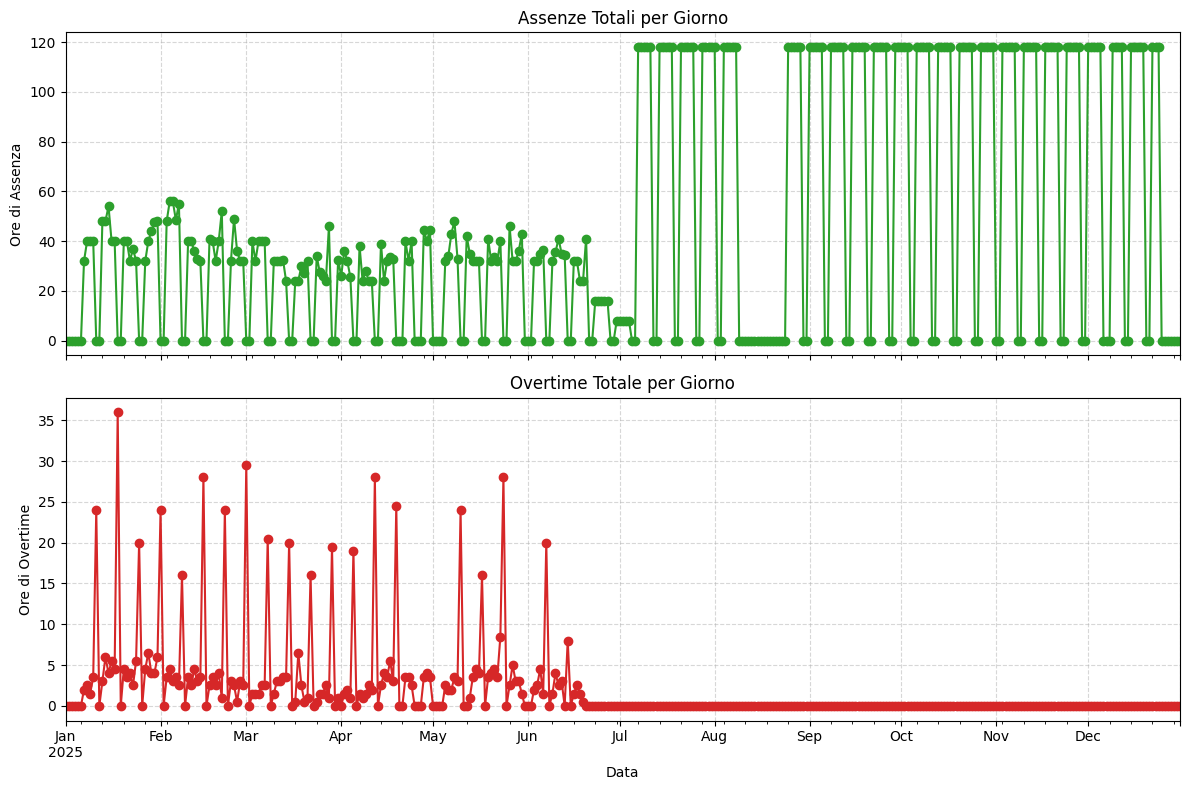

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Assicuriamoci che GIORNODATA sia datetime
df_hr['GIORNODATA'] = pd.to_datetime(df_hr['GIORNODATA'], dayfirst=True, errors='coerce')

# 2) Aggrega per giorno: overtime positivo e assenza (negativo reso positivo)
daily = (
    df_hr
    .groupby('GIORNODATA')['STRAORDINARIO']
    .agg(
        overtime = lambda x: x[x>0].sum(),
        absence  = lambda x: (-x[x<0]).sum()
    )
    .sort_index()
)

# 3) Traccia le due serie in due subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, dpi=100)

daily['absence'].plot(ax=axes[0], marker='o', linestyle='-', color='C2')
axes[0].set_ylabel('Ore di Assenza')
axes[0].set_title('Assenze Totali per Giorno')

daily['overtime'].plot(ax=axes[1], marker='o', linestyle='-', color='C3')
axes[1].set_ylabel('Ore di Overtime')
axes[1].set_title('Overtime Totale per Giorno')

# 4) Ritocchi estetici
plt.xlabel('Data')
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


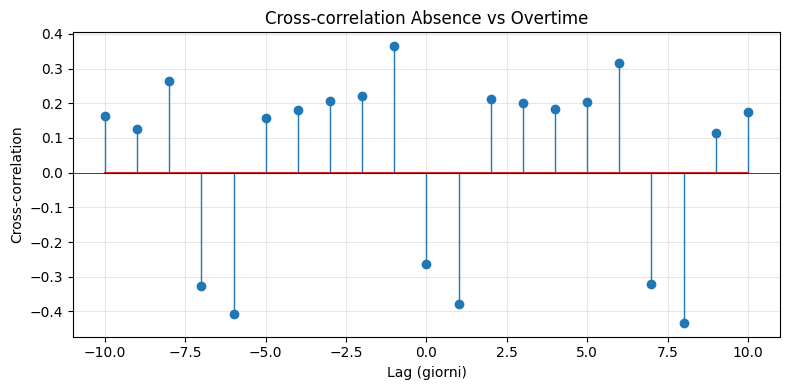

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# -- 1) Definisci il periodo su cui vuoi calcolare la cross-correlation --
mask = (daily.index < '2025-07-01')  # adatta la data di cutoff se serve
abs_series = daily.loc[mask, 'absence']
ot_series  = daily.loc[mask, 'overtime']

# -- 2) Normalizza le serie (media=0, varianza=1) --
abs_norm = (abs_series - abs_series.mean()) / abs_series.std()
ot_norm  = (ot_series  - ot_series.mean())  / ot_series.std()

# -- 3) Calcola cross-correlation per lag da -10 a +10 giorni --
lags = np.arange(-10, 11)
xcorr = [abs_norm.corr(ot_norm.shift(l)) for l in lags]

# -- 4) Plotta lo stem plot senza il parametro deprecato --
plt.figure(figsize=(8, 4))
markerline, stemlines, baseline = plt.stem(lags, xcorr)
plt.setp(stemlines,  'linewidth', 1)
plt.setp(markerline, 'markersize', 6)

plt.axhline(0, color='k', linewidth=0.5)
plt.xlabel('Lag (giorni)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation Absence vs Overtime')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
